# <font color='green'>Lead Score - Case Study</font>

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Steps performed for the analysis:
* Importing the required libraries and the dataset
* Inspecting the DataFrame
* Checking for missing values
* Analyzing coloumns individually and handling missing values
* Univariate Analysis and outlier treatment
* Dropping redundant columns
* Converting some binary variables (Yes/No) to 0/1
* Grouping coloumn features
* Dummy creation
* Train - Test Split
* Feature Scaling
* Model Building
* Feature Selection Using RFE
* Plotting the ROC Curve
* Finding Optimal Cut-Off Points
* Precision and Recall
* Making Predictions on the Test Set

# 1. Importing the required libraries and the dataset

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 2. Inspecting the DataFrame

In [3]:
lead_data.shape

(9240, 37)

In [4]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Replacing the 'Select' with NA values
lead_data = lead_data.replace('Select', np.nan)

In [7]:
lead_data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


# 3. Checking for missing values and dropping columns with more than 40% missing value

In [8]:
# No of missing values
features_with_na=[features for features in lead_data.columns if lead_data[features].isnull().sum()>1]
len(features_with_na)

17

In [9]:
# Each categories and percentage of missing values 
for feature in features_with_na:
    print(feature, "  ----->  ", np.round(lead_data[feature].isnull().mean()*100, 2),    ' % missing values')

Lead Source   ----->   0.39  % missing values
TotalVisits   ----->   1.48  % missing values
Page Views Per Visit   ----->   1.48  % missing values
Last Activity   ----->   1.11  % missing values
Country   ----->   26.63  % missing values
Specialization   ----->   36.58  % missing values
How did you hear about X Education   ----->   78.46  % missing values
What is your current occupation   ----->   29.11  % missing values
What matters most to you in choosing a course   ----->   29.32  % missing values
Tags   ----->   36.29  % missing values
Lead Quality   ----->   51.59  % missing values
Lead Profile   ----->   74.19  % missing values
City   ----->   39.71  % missing values
Asymmetrique Activity Index   ----->   45.65  % missing values
Asymmetrique Profile Index   ----->   45.65  % missing values
Asymmetrique Activity Score   ----->   45.65  % missing values
Asymmetrique Profile Score   ----->   45.65  % missing values


In [10]:
emptycol=lead_data.isnull().sum()/len(lead_data)*100
emptycol=emptycol[emptycol.values>=40]
emptycol

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [11]:
a=emptycol[emptycol.values>=40]

In [12]:
# dropping the empty columns
emptycol = a.index
lead_data.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

7


In [13]:
lead_data.shape

(9240, 30)

In [14]:
features_with_na=[features for features in lead_data.columns if lead_data[features].isnull().sum()>1]
len(features_with_na)

10

In [15]:
for feature in features_with_na:
    print(feature, "  ----->  ", np.round(lead_data[feature].isnull().mean()*100, 2),    ' % missing values')

Lead Source   ----->   0.39  % missing values
TotalVisits   ----->   1.48  % missing values
Page Views Per Visit   ----->   1.48  % missing values
Last Activity   ----->   1.11  % missing values
Country   ----->   26.63  % missing values
Specialization   ----->   36.58  % missing values
What is your current occupation   ----->   29.11  % missing values
What matters most to you in choosing a course   ----->   29.32  % missing values
Tags   ----->   36.29  % missing values
City   ----->   39.71  % missing values


# 4. Analyzing coloumns individually,grouping categories and handling missing values

In [16]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [17]:
# Dropping unique valued columns
df1= lead_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [18]:
df1.shape

(9240, 25)

In [19]:
df1['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
df1['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
df1['Country'].value_counts(dropna=False).head(10)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Name: Country, dtype: int64

In [22]:
df1['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
# Filling NaN values
df1['Specialization'] = df1['Specialization'].fillna('not provided') 
df1['What matters most to you in choosing a course'] = df1['What matters most to you in choosing a course'].fillna('not provided')
df1['Country'] = df1['Country'].fillna('not provided')
df1['What is your current occupation'] = df1['What is your current occupation'].fillna('not provided')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [24]:
for feature in features_with_na:
    print(feature, "  ----->  ", np.round(df1[feature].isnull().mean()*100, 2),    ' % missing values')

Lead Source   ----->   0.39  % missing values
TotalVisits   ----->   1.48  % missing values
Page Views Per Visit   ----->   1.48  % missing values
Last Activity   ----->   1.11  % missing values
Country   ----->   0.0  % missing values
Specialization   ----->   0.0  % missing values
What is your current occupation   ----->   0.0  % missing values
What matters most to you in choosing a course   ----->   0.0  % missing values
Tags   ----->   36.29  % missing values
City   ----->   39.71  % missing values


In [25]:
# Grouping countries
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df1['Country'] = df1.apply(lambda x:slots(x['Country']), axis = 1)
df1['Country'].value_counts()

outside india    6779
not provided     2461
Name: Country, dtype: int64

In [26]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
len(features_with_na)

6

In [27]:
for feature in features_with_na:
    print(feature, "  ----->  ", np.round(df1[feature].isnull().mean()*100, 2),    ' % missing values')

Lead Source   ----->   0.39  % missing values
TotalVisits   ----->   1.48  % missing values
Page Views Per Visit   ----->   1.48  % missing values
Last Activity   ----->   1.11  % missing values
Tags   ----->   36.29  % missing values
City   ----->   39.71  % missing values


In [28]:
#Grouping tags
df1['Tags'] = df1['Tags'].replace(np.nan, 'not provided')

df1['Tags'] = df1['Tags'].replace(['Recognition issue (DEC approval)', 'Shall take in the next coming month', 
                                      'University not recognized', 'Lateral student',
                                       'In confusion whether part time or DLP', 'Interested in Next batch, Still Thinking',
                                       'Want to take admission but has financial problems', 'Lost to Others',
                                      'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given',
                                      'Diploma holder (Not Eligible)', 'invalid number', 'Graduation in progress',
                                      'Interested  in full time MBA', 'Not doing further education', 'Lost to EINS', 'Busy',
                                      'switched off'], 'Other Tags')

In [29]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
len(features_with_na)

5

In [30]:
for feature in features_with_na:
    print(feature, "  ----->  ", np.round(df1[feature].isnull().mean()*100, 2),    ' % missing values')

Lead Source   ----->   0.39  % missing values
TotalVisits   ----->   1.48  % missing values
Page Views Per Visit   ----->   1.48  % missing values
Last Activity   ----->   1.11  % missing values
City   ----->   39.71  % missing values


In [31]:
df1['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
df1.drop(["City"],inplace=True,axis=1)

features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
len(features_with_na)

4

In [33]:
for feature in features_with_na:
    print(feature, "  ----->  ", np.round(df1[feature].isnull().mean()*100, 2),    ' % missing values')

Lead Source   ----->   0.39  % missing values
TotalVisits   ----->   1.48  % missing values
Page Views Per Visit   ----->   1.48  % missing values
Last Activity   ----->   1.11  % missing values


In [34]:
df1['Lead Source'].value_counts(dropna= False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [35]:
df1['Lead Source'] = df1['Lead Source'].fillna(df1['Lead Source'].mode()[0])

In [36]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
len(features_with_na)

3

In [37]:
for feature in features_with_na:
    print(feature, "  ----->  ", np.round(df1[feature].isnull().mean()*100, 2),    ' % missing values')

TotalVisits   ----->   1.48  % missing values
Page Views Per Visit   ----->   1.48  % missing values
Last Activity   ----->   1.11  % missing values


In [38]:
df1['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
df1['Last Activity'] = df1['Last Activity'].fillna(df1['Last Activity'].mode()[0])

In [40]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
len(features_with_na)

2

In [41]:
for feature in features_with_na:
    print(feature, "  ----->  ", np.round(df1[feature].isnull().mean()*100, 2),    ' % missing values')

TotalVisits   ----->   1.48  % missing values
Page Views Per Visit   ----->   1.48  % missing values


In [42]:
df1['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [43]:
df1['TotalVisits'] = df1['TotalVisits'].replace(np.nan, df1['TotalVisits'].median())

In [44]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
len(features_with_na)

1

In [45]:
for feature in features_with_na:
    print(feature, "  ----->  ", np.round(df1[feature].isnull().mean()*100, 2),    ' % missing values')

Page Views Per Visit   ----->   1.48  % missing values


In [46]:
df1['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [47]:
df1['Page Views Per Visit'] = df1['Page Views Per Visit'].replace(np.nan, df1['Page Views Per Visit'].median())

In [48]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]
len(features_with_na)

0

In [49]:
# No more missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [50]:
df1.shape

(9240, 24)

In [51]:
df1 = df1.drop('Prospect ID',1)
#df1 = df1.drop('Lead Number',1)
df1.shape

(9240, 23)

In [52]:
categorical_features=[feature for feature in df1.columns if df1[feature].dtypes=='O']

print('Number of categorical variables: ', len(categorical_features))

# visualise the numerical variables
df1[categorical_features].head()

Number of categorical variables:  18


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,not provided,not provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,API,Organic Search,No,No,Email Opened,outside india,not provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,outside india,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,outside india,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,outside india,not provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [53]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df1[feature].unique())))

The feature is Lead Origin and number of categories are 5
The feature is Lead Source and number of categories are 21
The feature is Do Not Email and number of categories are 2
The feature is Do Not Call and number of categories are 2
The feature is Last Activity and number of categories are 17
The feature is Country and number of categories are 2
The feature is Specialization and number of categories are 19
The feature is What is your current occupation and number of categories are 7
The feature is What matters most to you in choosing a course and number of categories are 4
The feature is Search and number of categories are 2
The feature is Newspaper Article and number of categories are 2
The feature is X Education Forums and number of categories are 2
The feature is Newspaper and number of categories are 2
The feature is Digital Advertisement and number of categories are 2
The feature is Through Recommendations and number of categories are 2
The feature is Tags and number of categorie

In [54]:
# list of numerical variables
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualising the numerical variables
df1[numerical_features].head()

Number of numerical variables:  5


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0.0,0,0.0
1,660728,0,5.0,674,2.5
2,660727,1,2.0,1532,2.0
3,660719,0,1.0,305,1.0
4,660681,1,2.0,1428,1.0


In [55]:
for feature in numerical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df1[feature].unique())))

The feature is Lead Number and number of categories are 9240
The feature is Converted and number of categories are 2
The feature is TotalVisits and number of categories are 41
The feature is Total Time Spent on Website and number of categories are 1731
The feature is Page Views Per Visit and number of categories are 114


# 5. Univariate Analysis and outlier treatment

In [56]:
# Defining a function to check categorical columns
def cat_plot(a):
    sns.countplot(x =a ,data=df1) #,hue=df1["Converted"]
    plt.xticks(rotation = 90)

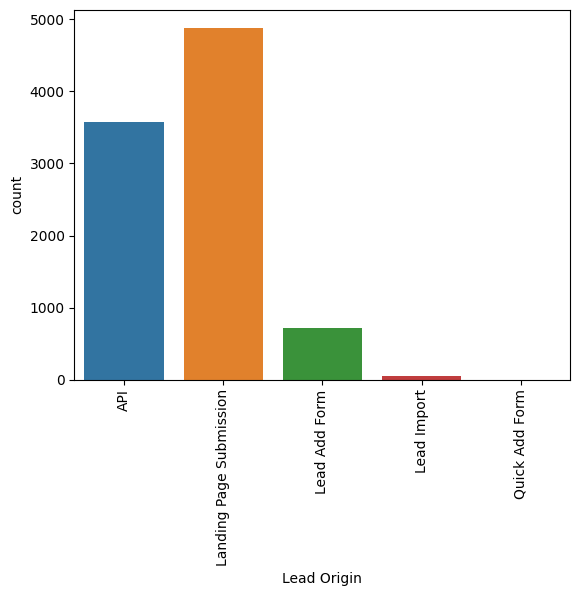

In [57]:
cat_plot("Lead Origin")

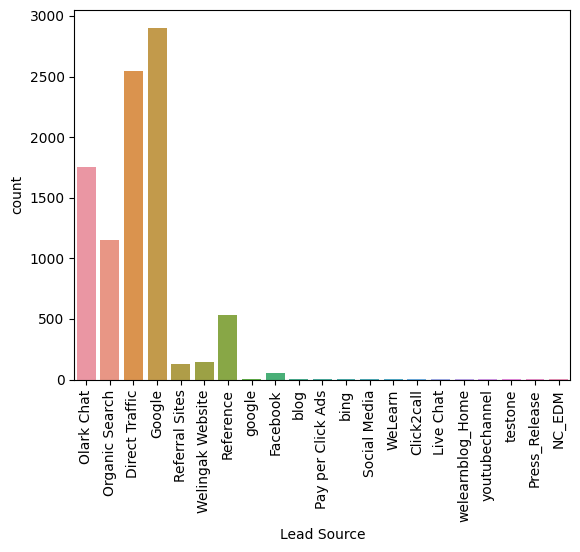

In [58]:
cat_plot("Lead Source")

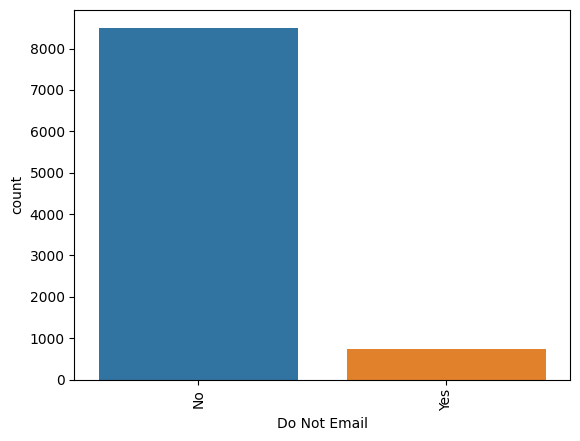

In [59]:
cat_plot("Do Not Email")

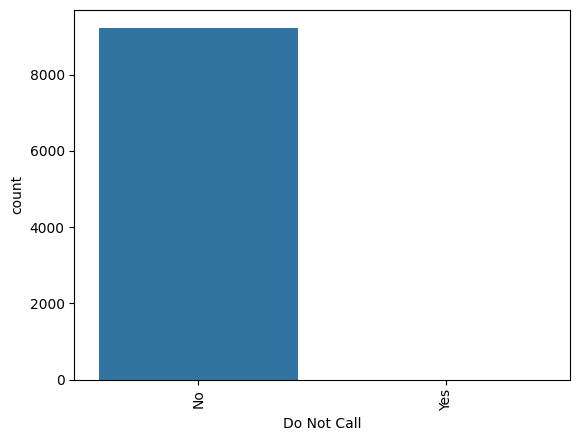

In [60]:
cat_plot("Do Not Call")

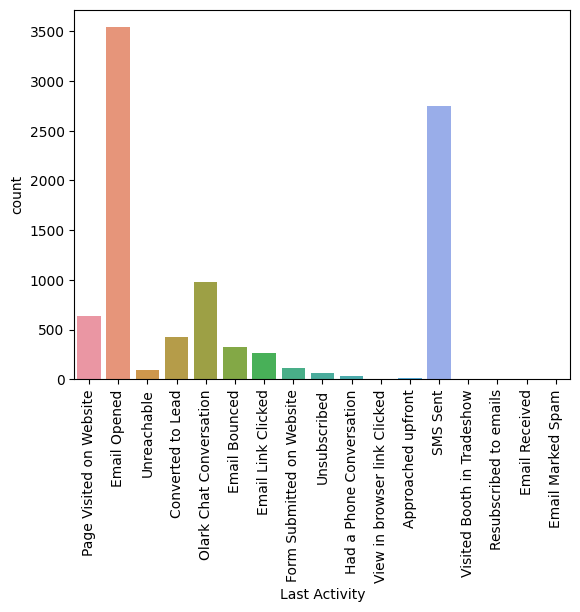

In [61]:
cat_plot("Last Activity")

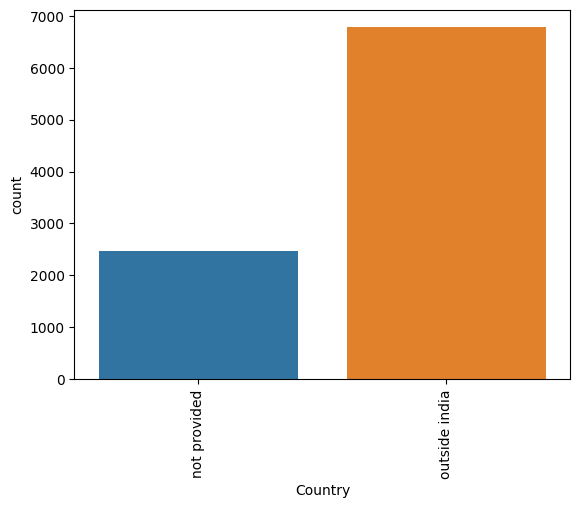

In [62]:
cat_plot("Country")

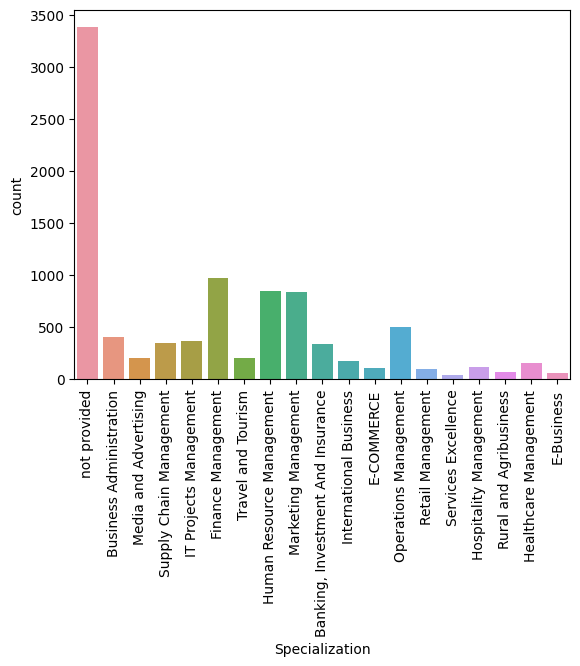

In [63]:
cat_plot("Specialization")

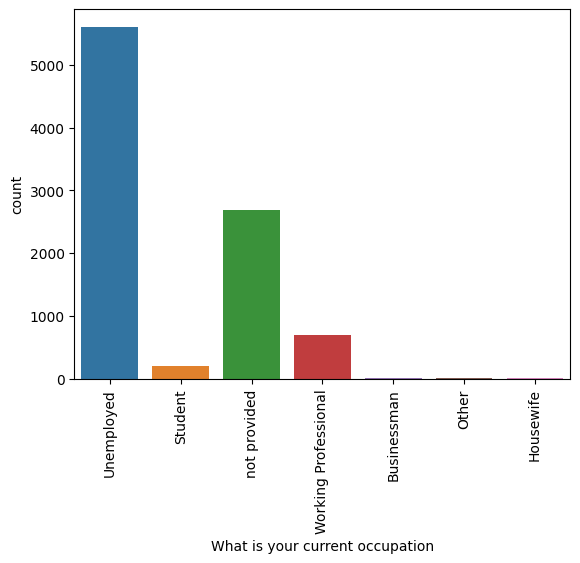

In [64]:
cat_plot("What is your current occupation")

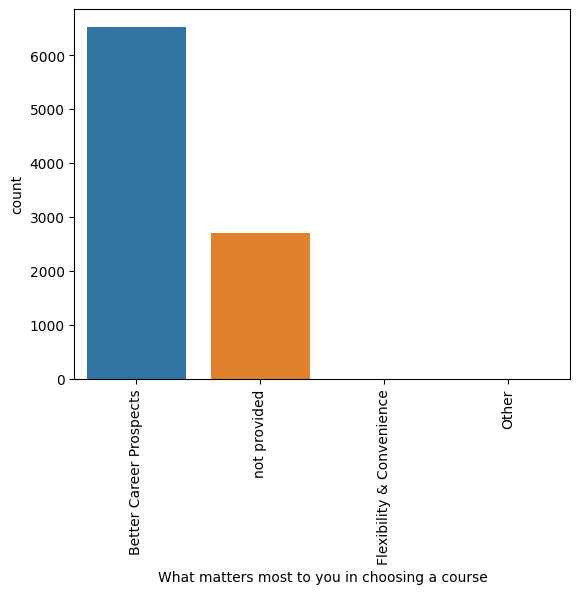

In [65]:
cat_plot("What matters most to you in choosing a course")

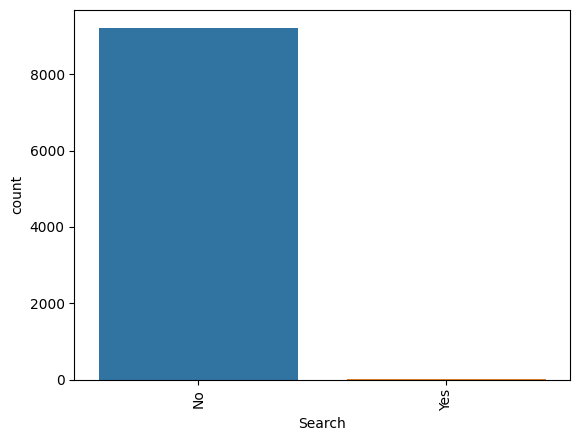

In [66]:
cat_plot("Search")

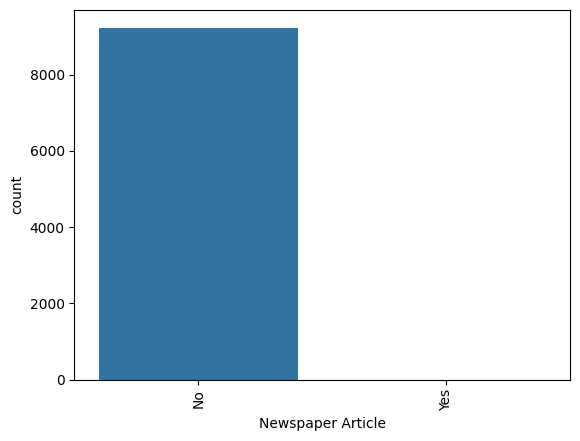

In [67]:
cat_plot("Newspaper Article")

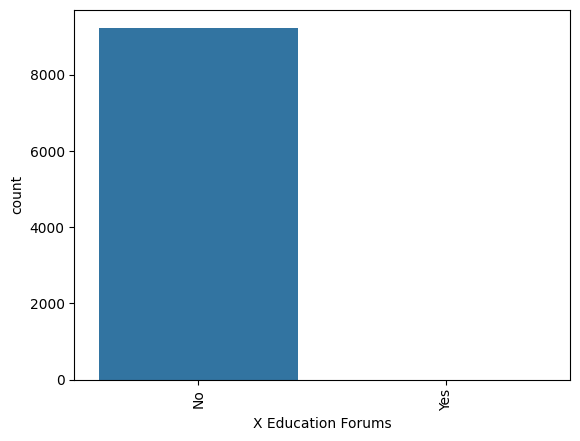

In [68]:
cat_plot("X Education Forums")

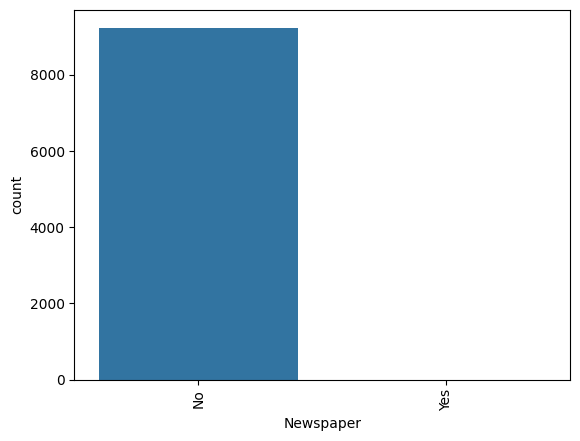

In [69]:
cat_plot("Newspaper")

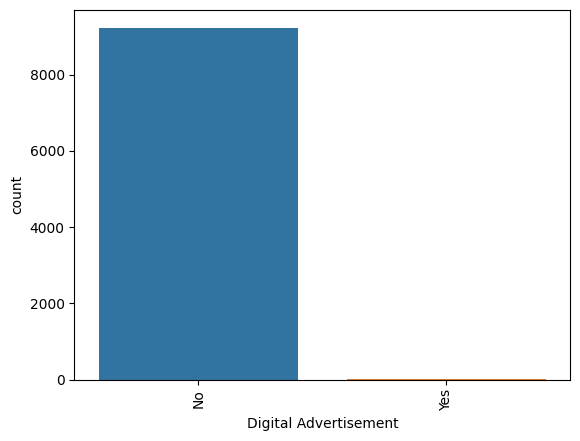

In [70]:
cat_plot("Digital Advertisement")

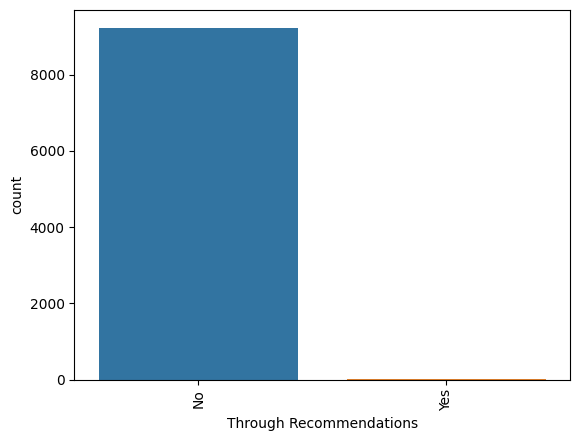

In [71]:
cat_plot("Through Recommendations")

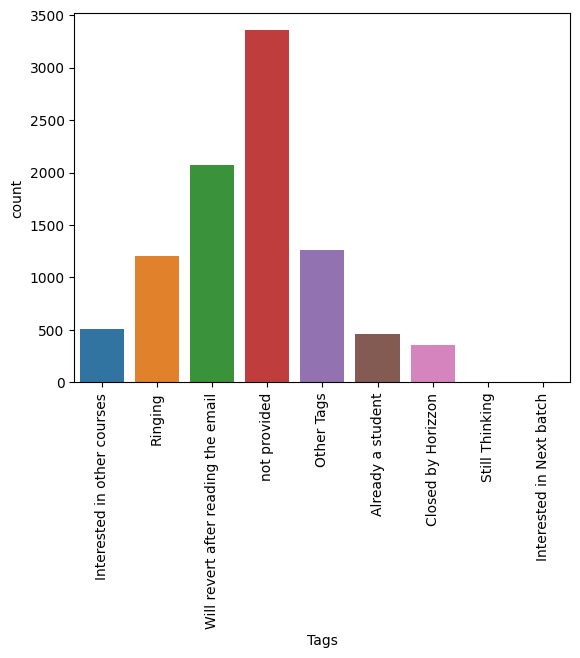

In [72]:
cat_plot("Tags")

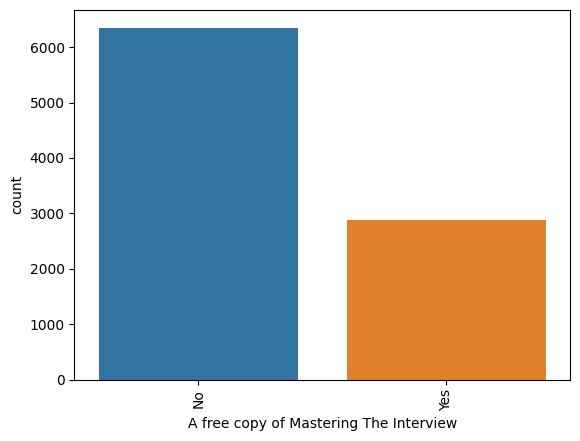

In [73]:
cat_plot("A free copy of Mastering The Interview")

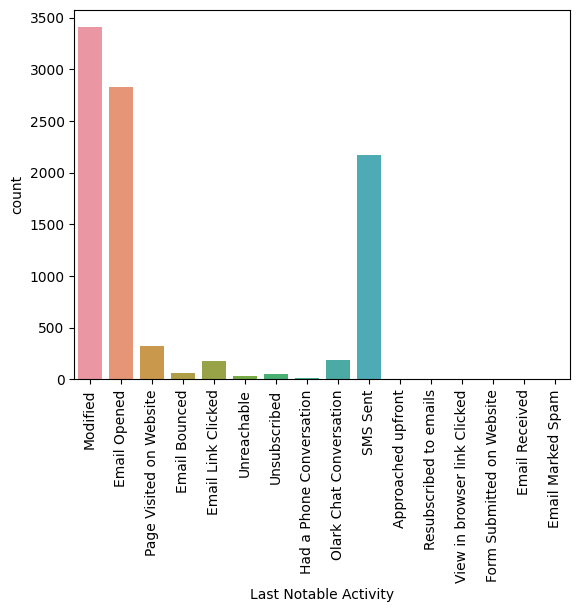

In [74]:
cat_plot("Last Notable Activity")

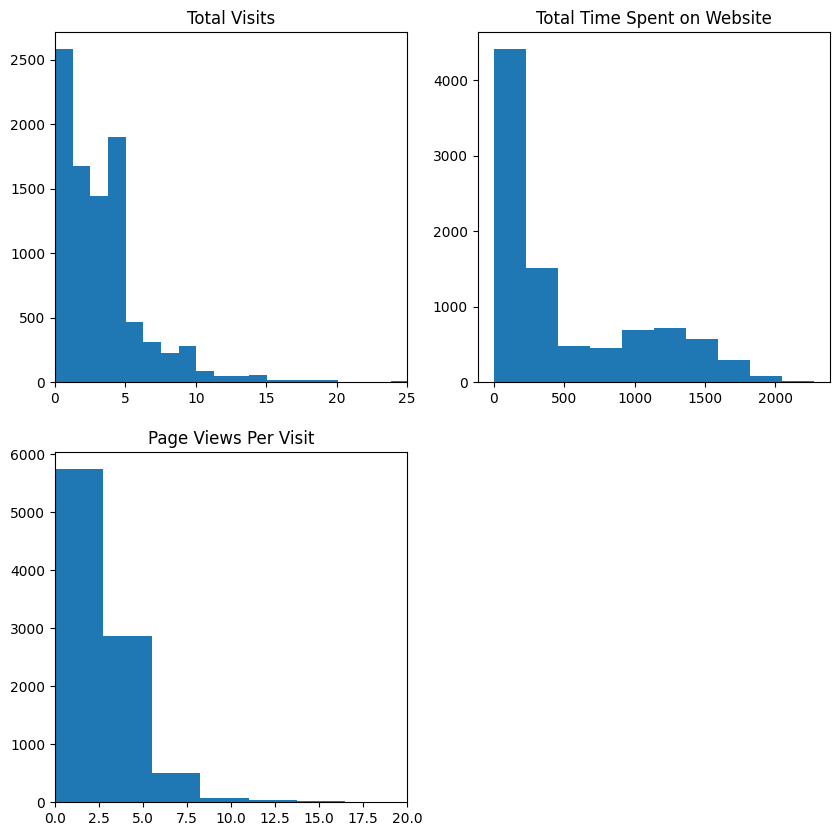

In [75]:
# Checking numerical data

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df1['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df1['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df1['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

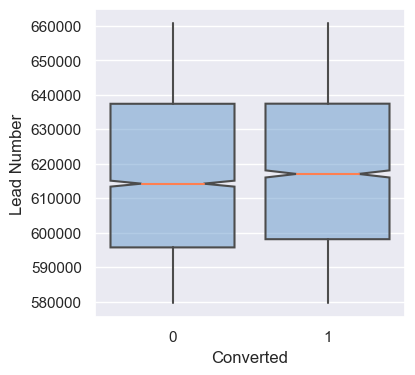

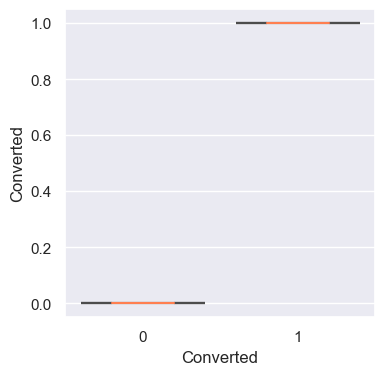

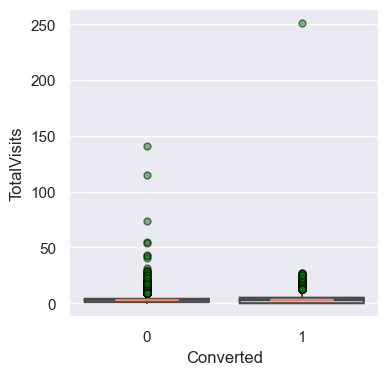

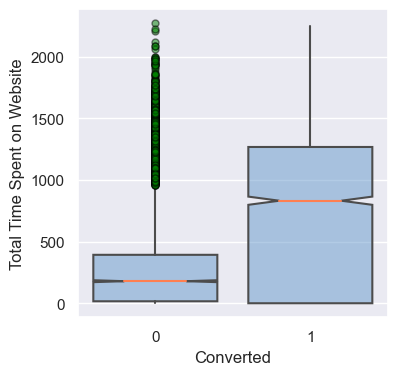

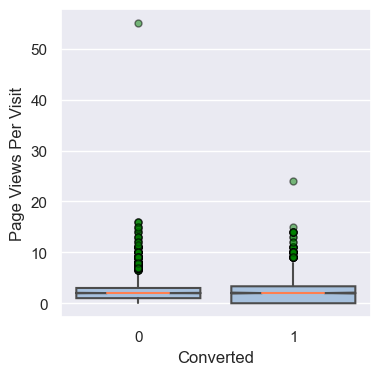

In [76]:
for i in numerical_features:
    #plt.figure(figsize=(7,3))
    flierprops = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='green', alpha=0.5)
    sns.set(rc={"figure.figsize":(4, 4)})
    sns.boxplot(data=df1, x=df1["Converted"], y=df1[i],flierprops=flierprops,
               notch=True, showcaps=False,
               boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
    plt.show()

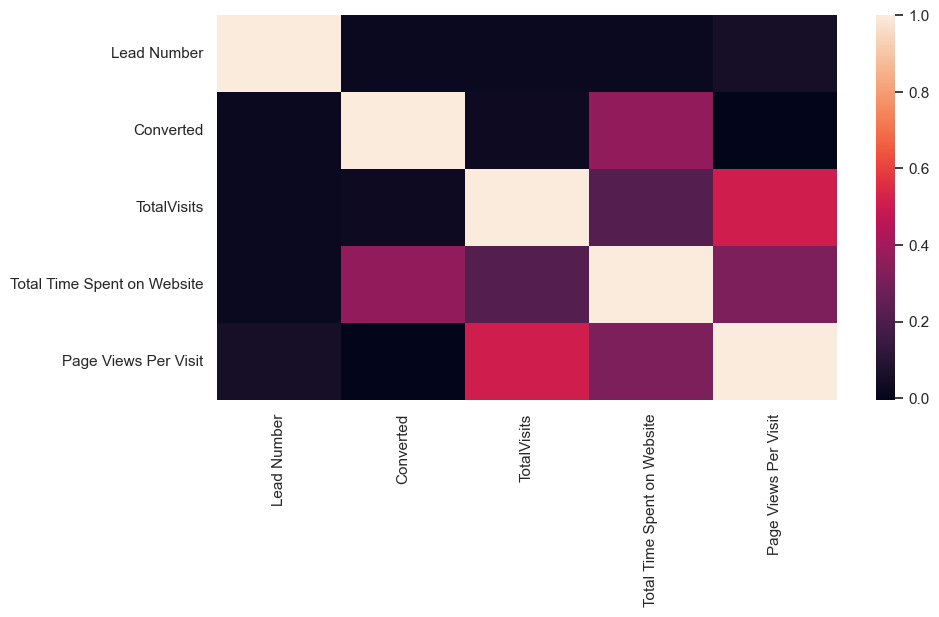

In [77]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr())
plt.show()

##### It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

# 6. Dropping redundant columns

In [79]:
df1.loc[:, df1.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [80]:
# Adding the redundant columns to cols_to_drop in order to drop them
cols_to_drop=[]
cols_to_drop.extend(['Do Not Call', 'Search',  'Newspaper Article',
                      'X Education Forums', 'Newspaper', 'Digital Advertisement',
                     'Through Recommendations'])

In [81]:
# Dropping the Variables
df1 = df1.drop(cols_to_drop, axis = 1)

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [83]:
df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not provided,not provided,Unemployed,Better Career Prospects,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,outside india,not provided,Unemployed,Better Career Prospects,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,outside india,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,outside india,Media and Advertising,Unemployed,Better Career Prospects,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,outside india,not provided,Unemployed,Better Career Prospects,Will revert after reading the email,No,Modified


# 7. Converting some binary variables (Yes/No) to 0/1

In [84]:
# List of variables to map
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df1[varlist] = df1[varlist].apply(binary_map)

In [85]:
df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,not provided,not provided,Unemployed,Better Career Prospects,Interested in other courses,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,outside india,not provided,Unemployed,Better Career Prospects,Ringing,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,outside india,Business Administration,Student,Better Career Prospects,Will revert after reading the email,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,outside india,Media and Advertising,Unemployed,Better Career Prospects,Ringing,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,outside india,not provided,Unemployed,Better Career Prospects,Will revert after reading the email,0,Modified


# 8. Grouping coloumn features

In [86]:
cat_cols = df1.select_dtypes(include = 'object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'Last Notable Activity'],
      dtype='object')

In [87]:
# Grouping categorical columns

df1['Lead Source'] = df1['Lead Source'].replace(['Referral Sites', 'Facebook', 'bing', 'google', 'Click2call',
                                                     'Live Chat', 'Social Media', 'Press_Release', 'testone',
                                                     'Pay per Click Ads', 'WeLearn', 'blog', 'welearnblog_Home',
                                                     'NC_EDM', 'youtubechannel'], 'Others')

df1['Last Activity'] = df1['Last Activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Email Marked Spam', 'Email Received',
                                                         'View in browser link Clicked', 'Approached upfront',
                                                         'Had a Phone Conversation', 'Unsubscribed', 'Unreachable'],
                                                        'Others')

df1['Specialization'] = df1['Specialization'].replace(['Finance Management', 'Human Resource Management',
                           'Marketing Management', 'Operations Management',
                                                          'IT Projects Management', 'Supply Chain Management',
                                                          'Healthcare Management', 'Hospitality Management',
                                                          'Retail Management'], 'Management Specializations')

df1['Specialization'] = df1['Specialization'].replace(['International Business', 'Rural and Agribusiness',
                                                          'E-Business'], 'Business Specializations')

df1['What is your current occupation'] = df1['What is your current occupation'].replace(['Housewife', 'Businessman'],
                                                                                           'Other')

df1['Last Notable Activity'] = df1['Last Notable Activity'].replace(['Email Bounced', 'Email Link Clicked',
                                                                         'Unreachable', 'Had a Phone Conversation',
                                                                        'Olark Chat Conversation', 'Approached upfront',
                                                                        'Resubscribed to emails', 'Unsubscribed',
                                                                         'View in browser link Clicked',
                                                                        'Form Submitted on Website', 'Email Received',
                                                                         'Email Marked Spam'], 'Others')

# 9. Dummy creation

In [88]:
# Lead Origin
Lead_Origin = pd.get_dummies(df1['Lead Origin'], prefix = 'Lead_Origin')
Lead_Origin = Lead_Origin.drop('Lead_Origin_Quick Add Form', axis = 1)
df1 = pd.concat([df1, Lead_Origin], axis = 1)

# Lead Source
Lead_Source = pd.get_dummies(df1['Lead Source'], prefix = 'Lead_Source')
Lead_Source = Lead_Source.drop('Lead_Source_Others', axis = 1)
df1 = pd.concat([df1, Lead_Source], axis = 1)

# Last Activity
Last_Activity = pd.get_dummies(df1['Last Activity'], prefix = 'Last_Activity')

df1 = pd.concat([df1, Last_Activity], axis = 1)

# Specialization
Special = pd.get_dummies(df1['Specialization'], prefix = 'Specialization')
Special = Special.drop('Specialization_not provided', axis = 1)
df1 = pd.concat([df1, Special], axis = 1)

# What is your current occupation
occup = pd.get_dummies(df1['What is your current occupation'], prefix = 'Occupation')
occup = occup.drop('Occupation_Other', axis = 1)
df1 = pd.concat([df1, occup], axis = 1)

# Tags
tags = pd.get_dummies(df1['Tags'], prefix = 'Tags')
tags = tags.drop('Tags_not provided', axis = 1)
df1 = pd.concat([df1, tags], axis = 1)

# Last Notable Activity
act = pd.get_dummies(df1['Last Notable Activity'], prefix = 'Last_Notable_Activity')
act = act.drop('Last_Notable_Activity_Others', axis = 1)
df1 = pd.concat([df1, act], axis = 1)

# What matters most to you in choosing a course
wmcc =pd.get_dummies(df1['What matters most to you in choosing a course'], 
                     prefix = 'What_matters_most_to_you_in_choosing_a_course')

df1 = pd.concat([df1, wmcc], axis = 1)


# Country
cou=pd.get_dummies(df1['Country'], 
                     prefix = 'Country_')

df1 = pd.concat([df1, cou], axis = 1)

# Dropping repeated columns after dummy creation
df1 = df1.drop(cat_cols, axis = 1)

In [89]:
df1.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Occupation_not provided,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,What_matters_most_to_you_in_choosing_a_course_Better Career Prospects,What_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,What_matters_most_to_you_in_choosing_a_course_Other,What_matters_most_to_you_in_choosing_a_course_not provided,Country__not provided,Country__outside india
0,660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,660727,0,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
3,660719,0,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,660681,0,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1


# 10. Train - Test Split

In [90]:
y = df1['Converted']

X = df1.drop('Converted', axis = 1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 100)

X_train.head(7)

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Occupation_not provided,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,What_matters_most_to_you_in_choosing_a_course_Better Career Prospects,What_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,What_matters_most_to_you_in_choosing_a_course_Other,What_matters_most_to_you_in_choosing_a_course_not provided,Country__not provided,Country__outside india
1871,641410,0,0.0,0,0.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
6795,597687,0,4.0,487,1.33,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3516,626825,0,5.0,106,2.50,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8105,587928,0,5.0,1230,5.00,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3934,622366,0,0.0,0,0.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4844,613574,0,4.0,1502,2.00,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
3297,628456,0,7.0,85,3.50,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


# 11. Feature Scaling

In [92]:
# Scaling the Numerical variables
scaler = StandardScaler()

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Business Specializations,Specialization_E-COMMERCE,Specialization_Management Specializations,Specialization_Media and Advertising,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Occupation_not provided,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,What_matters_most_to_you_in_choosing_a_course_Better Career Prospects,What_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,What_matters_most_to_you_in_choosing_a_course_Other,What_matters_most_to_you_in_choosing_a_course_not provided,Country__not provided,Country__outside india
1871,641410,0,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
6795,597687,0,0.100767,0.005716,-0.470569,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3516,626825,0,0.290067,-0.691418,0.070401,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8105,587928,0,0.290067,1.365219,1.226321,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3934,622366,0,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


# 12. Model Building

In [93]:
# Model 1
# Model building using statsmodels

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6415
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 22 Jan 2023   Deviance:                       60696.
Time:                        01:13:47   Pearson chi2:                 2.97e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -1.577e+15   4.14e+07  -3.81e+07      0.000   -1.58e+15   -1.58e+15
Lead Number                                                               3.44e+09     38.537   8.93e+07      0.000    3.44e+09    3.44e+09
Do Not Email                                                            -3.213e+14   4.27e+06  -7.53e+07      0.000   -3.21e+14   -3.21e+14
TotalVisits                                                              1.987e+13   9.96e+05   1.99e+07      0.000    1.99e+13    1.99e+13
Total Time Spent on Website                                              1.802e+14      1e+06    1.8e+08      0.000     1.8e+14     1.8e+14
Page Views Per Visit                                                     6.597e+12    1.2e+06   5.51e+06      0.000     6.6e+12     6.6e+12
A free copy of Mastering The Interview                                   1.176e+14   2.69e+06   4.38e+07      0.000    1.18e+14    1.18e+14
Lead_Origin_API                                                         -3.149e+15   6.83e+07  -4.61e+07      0.000   -3.15e+15   -3.15e+15
Lead_Origin_Landing Page Submission                                       -3.3e+15   6.81e+07  -4.84e+07      0.000    -3.3e+15    -3.3e+15
Lead_Origin_Lead Add Form                                               -2.786e+15   6.89e+07  -4.04e+07      0.000   -2.79e+15   -2.79e+15
Lead_Origin_Lead Import                                                 -3.268e+15   6.92e+07  -4.72e+07      0.000   -3.27e+15   -3.27e+15
Lead_Source_Direct Traffic                                              -8.151e+13   6.86e+06  -1.19e+07      0.000   -8.15e+13   -8.15e+13
Lead_Source_Google                                                      -6.597e+13   6.56e+06  -1.01e+07      0.000    -6.6e+13    -6.6e+13
Lead_Source_Olark Chat                                                  -3.166e+14   8.94e+06  -3.54e+07      0.000   -3.17e+14   -3.17e+14
Lead_Source_Organic Search                                              -8.727e+13   6.86e+06  -1.27e+07      0.000   -8.73e+13   -8.73e+13
Lead_Source_Reference                                                   -3.612e+14   1.36e+07  -2.66e+07      0.000   -3.61e+14   -3.61e+14
Lead_Source_Welingak Website                                            -1.232e+14   1.49e+07  -8.27e+06      0.000   -1.23e+14   -1.23e+14
Last_Activity_Converted to Lead                                          -9.35e+13   6.12e+06  -1.53e+07      0.000   -9.35e+13   -9.35e+13
Last_Activity_Email Bounced                                              -1.59e+14   6.93e+06   -2.3e+07      0.000   -1.59e+14   -1.59e+14
Las

# 13. Feature Selection Using RFE

In [94]:
# Logistic Regression
logreg = LogisticRegression()

rfe = RFE(logreg,  n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', False, 7),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead_Origin_API', True, 1),
 ('Lead_Origin_Landing Page Submission', False, 4),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 27),
 ('Lead_Source_Direct Traffic', False, 2),
 ('Lead_Source_Google', False, 20),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 17),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Welingak Website', False, 16),
 ('Last_Activity_Converted to Lead', False, 9),
 ('Last_Activity_Email Bounced', False, 12),
 ('Last_Activity_Email Link Clicked', False, 19),
 ('Last_Activity_Email Opened', False, 15),
 ('Last_Activity_Form Submitted on Website', False, 23),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Others', False, 29),
 ('Last_Activity_Page Visited on We

In [96]:
# Selected Variables
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Number', 'Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Specialization_Management Specializations',
       'Occupation_Working Professional', 'Occupation_not provided',
       'Tags_Closed by Horizzon', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last_Notable_Activity_Modified', 'Last_Notable_Activity_SMS Sent',
       'What_matters_most_to_you_in_choosing_a_course_Better Career Prospects',
       'What_matters_most_to_you_in_choosing_a_course_not provided',
       'Country__outside india'],
      dtype='object')

In [97]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Lead_Source_Welingak Website',
       'Last_Activity_Converted to Lead', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Form Submitted on Website', 'Last_Activity_Others',
       'Last_Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Business Specializations', 'Specialization_E-COMMERCE',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Occupation_Student',
       'Occupation_Unemployed', 'Tags_Already a student',
       'Tags_Inte

In [98]:
# Model 2
X_train_sm = sm.add_constant(X_train[cols])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1571.1
Date:                Sun, 22 Jan 2023   Deviance:                       3142.2
Time:                        01:13:49   Pearson chi2:                 8.99e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5698
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -5.5871      1.941     -2.878      0.004      -9.392      -1.782
Lead Number                                                            8.531e-06   2.08e-06      4.098      0.000    4.45e-06    1.26e-05
Total Time Spent on Website                                               1.0571      0.053     19.956      0.000       0.953       1.161
Lead_Origin_API                                                           0.6146      0.141      4.366      0.000       0.339       0.890
Lead_Origin_Lead Add Form                                                 3.9320      0.476      8.255      0.000       2.999       4.866
Lead_Source_Olark Chat                                                    0.5858      0.289      2.025      0.043       0.019       1.153
Lead_Source_Reference                                                    -2.5679      0.526     -4.887      0.000      -3.598      -1.538
Last_Activity_Olark Chat Conversation                                    -0.7870      0.212     -3.709      0.000      -1.203      -0.371
Last_Activity_SMS Sent                                                    1.5244      0.195      7.824      0.000       1.143       1.906
Specialization_Management Specializations                                 0.1336      0.122      1.099      0.272      -0.105       0.372
Occupation_Working Professional                                           0.6827      0.295      2.313      0.021       0.104       1.261
Occupation_not provided                                                  19.4286   1.27e+04      0.002      0.999   -2.49e+04     2.5e+04
Tags_Closed by Horizzon                                                   6.8383      1.020      6.707      0.000       4.840       8.836
Tags_Other Tags                                                          -0.1406      0.132     -1.062      0.288      -0.400       0.119
Tags_Ringing                                                             -3.2978      0.241    -13.675      0.000      -3.770      -2.825
Tags_Will revert after reading the email                                  4.1816      0.194     21.595      0.000       3.802       4.561
Last_Notable_Activity_Modified                                           -0.9877      0.130     -7.615      0.000      -1.242      -0.734
Last_Notable_Activity_SMS Sent                                            0.5126      0.225      2.278      0.023       0.072       0.954
What_matters_most_to_you_in_choosing_a_course_Better Career Prospects    -1.1256      1.418     -0.794      0.427      -3.905       1.654
What_matters_most_to_you_in_choosing_a_course_n

In [99]:
# Lead_Origin_Lead Add Form
# Tags_Still Thinking
# What_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience

# Dropping the variables with p-values greater than 0.05
cols = cols.drop(['Occupation_not provided','Tags_Other Tags',
                 'What_matters_most_to_you_in_choosing_a_course_Better Career Prospects',
                 'What_matters_most_to_you_in_choosing_a_course_not provided'])
cols

Index(['Lead Number', 'Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Specialization_Management Specializations',
       'Occupation_Working Professional', 'Tags_Closed by Horizzon',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last_Notable_Activity_Modified', 'Last_Notable_Activity_SMS Sent',
       'Country__outside india'],
      dtype='object')

In [100]:
# Model 3
X_train_sm = sm.add_constant(X_train[cols])

logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.4
Date:                Sun, 22 Jan 2023   Deviance:                       3176.7
Time:                        01:13:49   Pearson chi2:                 9.29e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5675
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -6.8606      1.317     -5.208      0.000      -9.442      -4.279
Lead Number                                8.225e-06   2.07e-06      3.978      0.000    4.17e-06    1.23e-05
Total Time Spent on Website                   1.0573      0.053     20.126      0.000       0.954       1.160
Lead_Origin_API                               0.6528      0.139      4.695      0.000       0.380       0.925
Lead_Origin_Lead Add Form                     4.2469      0.470      9.032      0.000       3.325       5.169
Lead_Source_Olark Chat                        0.5469      0.289      1.890      0.059      -0.020       1.114
Lead_Source_Reference                        -2.7161      0.524     -5.187      0.000      -3.742      -1.690
Last_Activity_Olark Chat Conversation        -0.8376      0.211     -3.976      0.000      -1.250      -0.425
Last_Activity_SMS Sent                        1.4009      0.192      7.312      0.000       1.025       1.776
Specialization_Management Specializations     0.1644      0.121      1.354      0.176      -0.074       0.402
Occupation_Working Professional               0.8094      0.299      2.707      0.007       0.223       1.395
Tags_Closed by Horizzon                       7.0812      1.016      6.968      0.000       5.089       9.073
Tags_Ringing                                 -3.0158      0.229    -13.141      0.000      -3.466      -2.566
Tags_Will revert after reading the email      4.4669      0.178     25.036      0.000       4.117       4.817
Last_Notable_Activity_Modified               -0.9722      0.129     -7.563      0.000      -1.224      -0.720
Last_Notable_Activity_SMS Sent                0.6646      0.222      2.995      0.003       0.230       1.100
Country__outside india                       -0.5348      0.279     -1.914      0.056      -1.083       0.013
=============================================================================================================
"""

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,41.04
15,Country__outside india,28.64
4,Lead_Source_Olark Chat,8.05
3,Lead_Origin_Lead Add Form,7.13
14,Last_Notable_Activity_SMS Sent,6.36
7,Last_Activity_SMS Sent,6.08
5,Lead_Source_Reference,4.41
2,Lead_Origin_API,3.41
8,Specialization_Management Specializations,2.82
13,Last_Notable_Activity_Modified,2.47


In [102]:
cols=cols.drop(['Lead Number','Country__outside india','Specialization_Management Specializations',
                'Lead_Source_Olark Chat','Lead_Origin_Lead Add Form','Last_Notable_Activity_SMS Sent',
                'Last_Activity_SMS Sent'])
cols

Index(['Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Source_Reference', 'Last_Activity_Olark Chat Conversation',
       'Occupation_Working Professional', 'Tags_Closed by Horizzon',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last_Notable_Activity_Modified'],
      dtype='object')

In [103]:
# Model 4
X_train_sm = sm.add_constant(X_train[cols])

logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1941.7
Date:                Sun, 22 Jan 2023   Deviance:                       3883.5
Time:                        01:13:49   Pearson chi2:                 6.60e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5176
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0701      0.065    -16.525      0.000      -1.197      -0.943
Total Time Spent on Website                  0.8010      0.042     19.067      0.000       0.719       0.883
Lead_Origin_API                              0.5198      0.088      5.927      0.000       0.348       0.692
Lead_Source_Reference                        1.8711      0.341      5.490      0.000       1.203       2.539
Last_Activity_Olark Chat Conversation       -1.0895      0.195     -5.589      0.000      -1.472      -0.707
Occupation_Working Professional              0.6129      0.272      2.257      0.024       0.081       1.145
Tags_Closed by Horizzon                      6.6104      1.011      6.536      0.000       4.628       8.593
Tags_Ringing                                -2.6333      0.214    -12.306      0.000      -3.053      -2.214
Tags_Will revert after reading the email     4.2358      0.168     25.207      0.000       3.906       4.565
Last_Notable_Activity_Modified              -1.2543      0.095    -13.171      0.000      -1.441      -1.068
============================================================================================================
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,1.59
1,Lead_Origin_API,1.55
2,Lead_Source_Reference,1.46
3,Last_Activity_Olark Chat Conversation,1.44
8,Last_Notable_Activity_Modified,1.44
4,Occupation_Working Professional,1.34
5,Tags_Closed by Horizzon,1.30
0,Total Time Spent on Website,1.21
6,Tags_Ringing,1.03


#### Model 4 is our final model since we have got p-values<0.05 and VIF<<5, which shows that the model is statistically significant.

In [105]:
#Predictions on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.01998178, 0.25626214, 0.02326228, ..., 0.22106094, 0.06388038,
       0.07489811])

#### Creating the DataFrame with Actual Converted and Predicted Probabilities

In [106]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.019982,1871
1,0,0.256262,6795
2,0,0.023262,3516
3,0,0.068516,8105
4,0,0.074898,3934


In [107]:
# Making a new column Predicted with values which have Probability greater than 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.019982,1871,0
1,0,0.256262,6795,0
2,0,0.023262,3516,0
3,0,0.068516,8105,0
4,0,0.074898,3934,0


In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted))

0.87847866419295


In [109]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted)
confusion

array([[3821,  181],
       [ 605, 1861]], dtype=int64)

#### Metrics beyond Simple Accuracy

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.7546634225466342
0.9547726136931535
0.04522738630684658
0.9113614103819785
0.8633077270673294


# 14. Plotting the ROC Curve

In [112]:
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                         drop_intermediate = False)

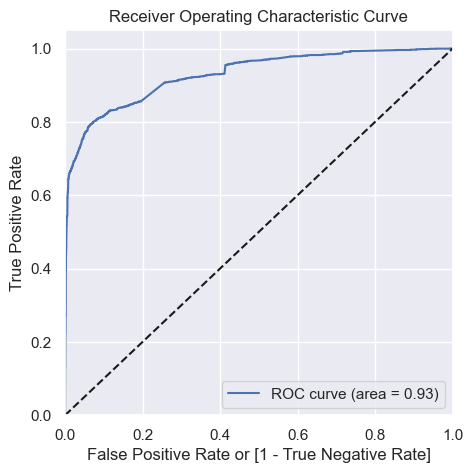

In [114]:
draw_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### The area under curve=0.93, which shows the model to be predicting good.

# 15. Finding Optimal Cut-off Points

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.019982,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.256262,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.023262,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.068516,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.074898,3934,0,1,0,0,0,0,0,0,0,0,0


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.702381     0.963098     0.541729
0.2   0.2  0.788806     0.911598     0.713143
0.3   0.3  0.866110     0.821573     0.893553
0.4   0.4  0.880643     0.789943     0.936532
0.5   0.5  0.878479     0.754663     0.954773
0.6   0.6  0.870130     0.708840     0.969515
0.7   0.7  0.865646     0.677616     0.981509
0.8   0.8  0.863173     0.658962     0.989005
0.9   0.9  0.858689     0.642336     0.992004


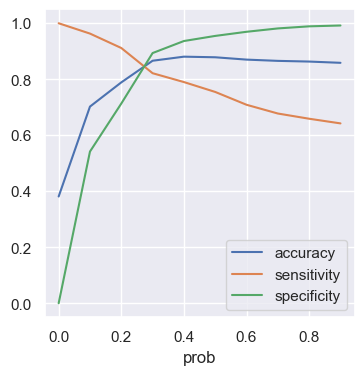

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, we can see that 0.3 is our Optimal Point

In [118]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.019982,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.256262,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.023262,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.068516,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.074898,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted))

0.8661100803957947


In [120]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted)
confusion

array([[3576,  426],
       [ 440, 2026]], dtype=int64)

Metrics beyond Simple Accuracy with 0.3 as Optimal Cutoff point

In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# Positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.8215733982157339
0.8935532233883059
0.10644677661169415
0.8262642740619902
0.8904382470119522


# 16. Precision and Recall

In [123]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8262642740619902

In [124]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8215733982157339

### Precision and Recall Tradeoff

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

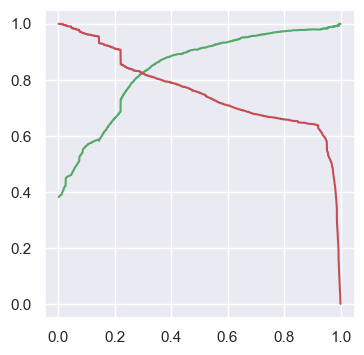

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 17. Making Predictions on the Test Set

In [127]:
# Scaling the Numerical Variables
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [128]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead_Origin_API,Lead_Source_Reference,Last_Activity_Olark Chat Conversation,Occupation_Working Professional,Tags_Closed by Horizzon,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Modified
4269,0.964504,1,0,0,0,0,0,0,0
2376,-0.885371,0,1,0,0,0,0,1,0
7766,-0.777416,1,0,0,1,0,0,1,0
9199,-0.885371,1,0,1,0,0,0,0,1
4359,-0.885371,0,1,0,0,0,0,1,0


In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
# Predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

4269    0.555357
2376    0.986973
7766    0.975294
9199    0.026513
4359    0.986973
dtype: float64

In [131]:
# Converting y_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.555357
2376,0.986973
7766,0.975294
9199,0.026513
4359,0.986973


In [132]:
# Converting y_test to DataFrame
y_test_df = pd.DataFrame(y_test)

In [133]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [134]:
# Removing index for both DataFrames to concatenate them side by side
y_pred_1.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [135]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.555357
1,1,2376,0.986973
2,1,7766,0.975294
3,0,9199,0.026513
4,1,4359,0.986973


In [136]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns = {0: 'Converted_Prob'})

In [137]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.555357
1,2376,1,0.986973
2,7766,1,0.975294
3,9199,0,0.026513
4,4359,1,0.986973


In [138]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,4269,1,0.555357,1
1,2376,1,0.986973,1
2,7766,1,0.975294,1
3,9199,0,0.026513,0
4,4359,1,0.986973,1


In [139]:
# Overall Accuracy
metrics.accuracy_score(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)

0.8596681096681097

In [140]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)
confusion2

array([[1480,  197],
       [ 192,  903]], dtype=int64)

In [141]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [142]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# Positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.8246575342465754
0.8825283243887895
0.1174716756112105
0.8209090909090909
0.8851674641148325


# 18. Assigning the Lead Score to the data

In [143]:
y_pred_final['Score'] = round(y_pred_final['Converted_Prob'] * 100, 2)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Score
0,4269,1,0.555357,1,55.54
1,2376,1,0.986973,1,98.70
2,7766,1,0.975294,1,97.53
3,9199,0,0.026513,0,2.65
4,4359,1,0.986973,1,98.70


In [144]:
ResultDf = y_pred_final.sort_values(by='Score', ascending=False)

In [145]:
#Displaying the top leads
ResultDf.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Score
2740,6944,1,0.999875,1,99.99
835,4613,1,0.999876,1,99.99
1091,818,1,0.999933,1,99.99
546,3478,1,0.999803,1,99.98
745,6383,1,0.999795,1,99.98


In [146]:
FilteredResult = ResultDf.loc[ResultDf['Score'] >= 30]

### <font color='darkcyan'>Percentages of Converted Values before Model Building</font>

In [147]:
# Checking the Percentages of Converted Values
sum(df1['Converted'])/len(df1['Converted'])*100

38.53896103896104

### <font color='darkcyan'>Percentages of Converted Values after Model Building</font>

In [148]:
#Checking the Converted Rate
Converted_Rate_AfterModelling= (sum(FilteredResult['Converted'])/len(FilteredResult['Converted'].index))*100
Converted_Rate_AfterModelling

82.0909090909091

# <font color='green'>So it is evident that our model worked pretty well. The conversion rate before model building was 38.53% while after model building it went upto 82.09%. We were successful in target lead conversion rate to be even higher than 80% as demanded by the CEO of X Education.</font>

# 19. Conclusion

It was found that the variables that mattered the most in the potential buyers are (In ascending order) :

1. Tags_Will revert after reading the email
2. Lead_Origin_API
3. Lead_Source_Reference
4. Last_Activity_Olark Chat Conversation
5. Last_Notable_Activity_Modified
6. Occupation_Working Professional
7. Tags_Closed by Horizzon
8. Total Time Spent on Website
9. Tags_Ringing

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.